<a href="https://colab.research.google.com/github/wassanchez/DS_Wilson/blob/main/Copia_de_calculoDiferentesModelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IBERO/covid_19_indonesia_time_series_all.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [5]:
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [ ]:
data.isnull().sum()

Case          0
Restaurant    0
Price         0
Food          0
Decor         0
Service       0
East          0
dtype: int64

In [6]:
data.keys()

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

pandas.core.frame.DataFrame

In [12]:
df2 = data[['Population Density', 'New Cases', 'New Recovered', 'New Active Cases','New Deaths']].copy()
df2

,Population Density,New Cases,New Recovered,New Active Cases,New Deaths
0,16334.31,2,0,2,0
1,16334.31,2,0,2,0
2,138.34,2,0,2,0
3,69.80,1,0,1,0
4,16334.31,2,0,2,0
...,...,...,...,...,...
31817,190.17,37,0,37,0
31818,131.37,13,3,10,0
31819,89.72,16,1,15,0
31820,203.82,50,5,45,0


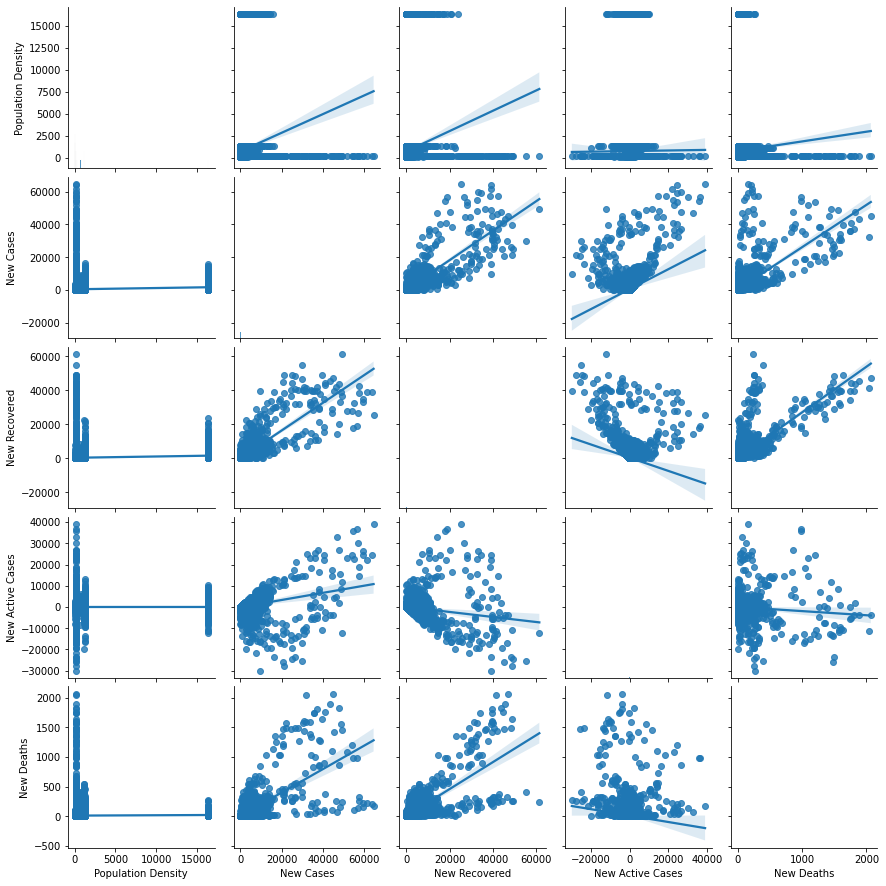

In [13]:
sns.pairplot(df2, kind='reg')

In [14]:
y = df2['New Deaths']
X = df2[['Population Density', 'New Cases', 'New Recovered', 'New Active Cases']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)#con random_state=0 dea que el sistema solo elija los datos de test y train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25457, 4) (6365, 4) (25457,) (6365,)


In [16]:
X_train

,Population Density,New Cases,New Recovered,New Active Cases
24660,36.81,793,284,509
18143,1158.90,930,2541,-1640
23352,203.82,1,0,1
20788,11.08,7,0,7
31348,27.52,32,48,-16
...,...,...,...,...
13123,11.08,15,19,-4
19648,1158.90,56,108,-56
9845,1109.64,150,155,-9
10799,846.78,935,885,16


In [17]:
lineal = LinearRegression() #aqui se crea el modelo
lineal

LinearRegression()

In [18]:
lineal.fit(X_train, y_train)#aqui se aplican los datos al modelo

LinearRegression()

In [19]:
lineal.coef_.tolist() # esta funcion entrega los coeficientes en el mismo orden de las variables del dataset de "X"

[-3.2204663205635054e-18,
 0.9999999999999994,
 -0.9999999999999998,
 -0.9999999999999996]

In [20]:
lineal.intercept_

1.2079226507921703e-13

In [21]:
y_pred_train_lineal = lineal.predict(X_train) # esto es lo que logra predecir con lo que usted me dijo que aprendiera
y_pred_train_lineal

array([-4.97379915e-14,  2.90000000e+01,  1.20024847e-13, ...,
        4.00000000e+00,  3.40000000e+01,  1.19015908e-13])

In [22]:
y_pred_test_lineal = lineal.predict(X_test) # esto es lo que logra predecir con los datos que no conoce
y_pred_test_lineal

array([8.00000000e+00, 1.80000000e+01, 1.17239551e-13, ...,
       1.20468995e-13, 5.00000000e+00, 2.00000000e+00])

# Metricas

In [23]:
# RAiz del error cuadratico medio; entre mas pequeño indica que el modelo es muy asertado
metrics.mean_squared_error(y_train,y_pred_train_lineal)

6.293794418060609e-25

In [24]:
metrics.mean_squared_error(y_test,y_pred_test_lineal)

8.002785788035974e-25

In [25]:
# 
metrics.mean_absolute_error(y_train,y_pred_train_lineal)

1.9862246906344986e-13

In [26]:
y_error_train = y_train - y_pred_train_lineal 
y_error_train

24660    4.973799e-14
18143    7.887024e-13
23352   -1.200248e-13
20788   -1.203125e-13
31348   -9.947598e-14
             ...     
13123   -1.136868e-13
19648   -7.815970e-14
9845    -6.394885e-14
10799    2.202682e-13
2732    -1.190159e-13
Name: New Deaths, Length: 25457, dtype: float64

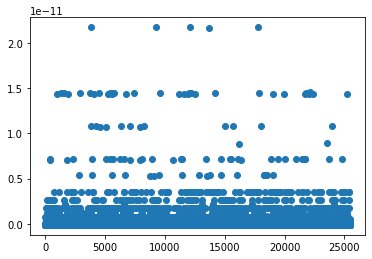

In [27]:
plt.scatter(x=range(len(y_error_train)), y=y_error_train)

In [28]:
y_error_test = y_test - y_pred_test_lineal 
y_error_test

25947    1.065814e-13
17736    4.973799e-14
2508    -1.172396e-13
27584   -1.199041e-13
3353    -1.145750e-13
             ...     
6498    -6.394885e-14
16271   -1.065814e-13
30426   -1.204690e-13
14251   -7.815970e-14
10884   -6.394885e-14
Name: New Deaths, Length: 6365, dtype: float64

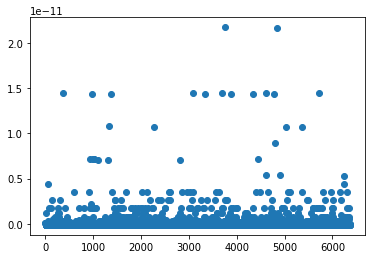

In [29]:
plt.scatter(x=range(len(y_error_test)), y=y_error_test)

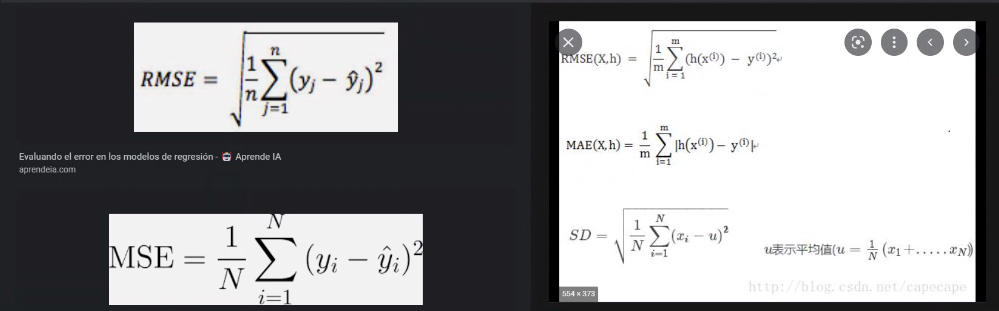